# Resources
https://github.com/ultimate010/crnn 
{Combination of Convolutional and Recurrent Neural Network for Sentiment Analysis of Short Texts}
https://keras.io/examples/imdb_bidirectional_lstm/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/My Projects/FYP/Sentiment Analysis/Implementation/Sentiment Analysis/CNN RNN

/content/drive/My Drive/My Projects/FYP/Sentiment Analysis/Implementation/Sentiment Analysis/CNN RNN


# Imports Statements

In [3]:
import collections
import pickle
import re
import random
import sys
import os 
import time


import gensim
from gensim.models.keyedvectors import KeyedVectors

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from __future__ import print_function

import pandas as pd
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
from numpy import cumsum

import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dropout, Activation, Flatten, \
    Embedding, Convolution1D, MaxPooling1D, AveragePooling1D, \
    Input, Dense, merge, Add,TimeDistributed, Bidirectional,SpatialDropout1D
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.regularizers import l2, l1_l2
from keras.constraints import maxnorm
from keras import callbacks
from keras.utils import generic_utils
from keras.models import Model
from keras.optimizers import Adadelta

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Load Data

In [0]:
DataTagged = pd.read_csv("/content/drive/My Drive/My Projects/FYP/Sentiment Analysis/Implementation/corpus/analyzed/comments_tagged_remove_all_punc_keep_question.csv", ";")
train_data, test_data = train_test_split(DataTagged, test_size=0.2, random_state=0)

# preprocess Data

In [0]:
def text_preprocessing(train_data,test_data):
  train_data_texts = train_data['comment']
  train_data_labels = train_data['label']
  test_data_texts = test_data['comment']
  test_data_labels = test_data['label']


  comment_texts = []
  comment_labels = []

  train_text = []
  test_text = []
  train_labels=[]
  test_labels=[]

  for label in train_data_labels:
    if label == "POSITIVE":
      train_labels.append(1)
    else:
      train_labels.append(0)
  comment_labels.append(train_labels)

  for label in test_data_labels:
    if label == "POSITIVE":
      test_labels.append(1)
    else:
      test_labels.append(0)
  comment_labels.append(test_labels)
  

  for comment in train_data_texts:
    lines = []
    try:
      words = comment.split()
      lines += words
    except:
      continue
    train_text.append(lines)
  comment_texts.append(train_text)

  for comment in test_data_texts:
    lines = []
    try:
      words = comment.split()
      lines += words
    except:
      continue
    test_text.append(lines)
  comment_texts.append(test_text)


  return comment_texts,comment_labels

In [6]:
comment_texts, comment_labels = text_preprocessing(train_data,test_data)

# prepare tokenizer
docs = comment_texts[0]+comment_texts[1]
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
print(vocab_size)

18416


In [7]:
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

[[132, 104, 444, 18, 206, 1, 5, 4428, 11, 4429, 1532, 374, 76, 159, 32, 6, 9, 422, 16, 2087, 154, 9, 3204], [203, 25], [317, 179, 4430, 302, 7095, 180, 2511, 7096, 6, 4431, 681, 7097, 722, 47, 7098, 7099, 2512, 4432, 1533, 886, 771, 7100, 7101, 1336, 7102, 1337, 7103, 7104, 33, 149, 126], [7105, 267, 2513, 76, 7106, 209, 14, 74, 23, 64, 1338, 1339, 52, 2513, 772, 4433, 246, 56, 93, 2513, 602, 7107, 9, 375, 723, 568, 94], [7108, 2514, 376, 277, 23, 141, 3205, 7109, 17, 287, 7110, 832, 24, 107, 16, 18, 31, 569, 4434], [347, 4435, 59, 31], [1, 7111, 3, 23, 29, 145, 3206, 278, 773, 38, 7112, 1534, 2515, 7113, 318, 1535, 4436, 4], [4437, 682, 196, 52, 3207, 3208, 887, 3209, 1536, 3210, 3211, 3212, 887, 2088, 3213, 3214], [1770, 1771, 603, 66, 570], [4438, 4439, 3, 310, 4440, 5, 14, 4441], [2516, 3215, 62, 7114, 258, 84, 2089, 13, 7115], [1082, 7116, 2517, 333, 7117, 99, 36, 2518, 16, 173], [85, 16, 724, 4442, 7118, 2519, 7119, 279, 2520, 7120, 33, 2, 2090], [1340, 398, 4443, 23, 982, 7121, 

In [8]:
max_length = 155
padded_docs = pad_sequences(encoded_docs, maxlen=max_length)
print(padded_docs)

[[   0    0    0 ...  154    9 3204]
 [   0    0    0 ...    0  203   25]
 [   0    0    0 ...   33  149  126]
 ...
 [   0    0    0 ...  297 6381 3160]
 [   0    0    0 ...   51    7  242]
 [   0    0    0 ... 1131 6688   39]]


In [0]:
labels = comment_labels[0]+comment_labels[1]
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.2, random_state=0)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Word Embedding

## Generate Embedding Metrix

In [0]:
# keyed_fasttext_path = '/content/drive/My Drive/University/FYP/Sentiment Analysis/Implementation/word_embedding/fasttext/fasttext_keyed_vectors/keyed.kv'
# word_vectors = KeyedVectors.load(keyed_fasttext_path, mmap='r')

In [0]:
# embeddings_index = dict()
# for word, vocab_obj in word_vectors.vocab.items():
#   embeddings_index[word]=word_vectors[word]

In [0]:
# create a weight matrix for words in training docs
# embedding_matrix = zeros((vocab_size, 300))
# for word, i in t.word_index.items():
# 	embedding_vector = embeddings_index.get(word)
# 	if embedding_vector is not None:
# 		embedding_matrix[i] = embedding_vector
# embedding_matrix_path = '/content/drive/My Drive/University/FYP/Sentiment Analysis/Implementation/Sentiment Analysis/CNN RNN/fasttetx_embedding_matrix'
# pickle.dump(embedding_matrix, open(embedding_matrix_path, 'wb'))

## Load Embedding Matrix

In [0]:
embedding_matrix_path = '/content/drive/My Drive/My Projects/FYP/Sentiment Analysis/Implementation/Sentiment Analysis/CNN RNN/fasttetx_embedding_matrix'
f = open(embedding_matrix_path, 'rb')
embedding_matrix= np.array(pickle.load(f))

# Models

## RNN(LSTM/GRU) model

In [0]:
def build_RNN_model():
    main_input = Input(shape=(maxlen, ), dtype='int32', name='main_input')
    embedding  = Embedding(max_features, embedding_dims,
                  weights=[embedding_matrix], input_length=maxlen,
                  name='embedding' ,trainable=False)(main_input)

    embedding = Dropout(0.50)(embedding)

    x = RNN(rnn_output_size)(embedding)


    x = Dense(hidden_dims, activation='relu', init='he_normal',
              W_constraint = maxnorm(3), b_constraint=maxnorm(3),
              name='mlp')(x)

    x = Dropout(0.10, name='drop')(x)

    output = Dense(1, init='he_normal',
                   activation='sigmoid', name='output')(x)

    model = Model(input=main_input, output=output)
    model.compile(loss={'output':'binary_crossentropy'},
                optimizer=Adadelta(lr=0.95, epsilon=1e-06),
                metrics=["accuracy"])
    return model

## CNN+RNN(LSTM /GRU) model 

In [0]:
def build_CNN_RNN_model():
    main_input = Input(shape=(maxlen, ), dtype='int32', name='main_input')
    embedding  = Embedding(max_features, embedding_dims,
                  weights=[embedding_matrix], input_length=maxlen,
                  name='embedding' ,trainable=False)(main_input)

    embedding = Dropout(0.50)(embedding)

    conv4 = Convolution1D(nb_filter=nb_filter,
                          filter_length=4,
                          border_mode='valid',
                          activation='relu',
                          subsample_length=1,
                          name='conv4')(embedding)
    maxConv4 = MaxPooling1D(pool_length=2,
                             name='maxConv4')(conv4)

    conv5 = Convolution1D(nb_filter=nb_filter,
                          filter_length=5,
                          border_mode='valid',
                          activation='relu',
                          subsample_length=1,
                          name='conv5')(embedding)
    maxConv5 = MaxPooling1D(pool_length=2,
                            name='maxConv5')(conv5)

    x = keras.layers.Concatenate(axis=1)([maxConv4, maxConv5])

    x = Dropout(0.15)(x)

    x = RNN(rnn_output_size)(x)


    x = Dense(hidden_dims, activation='relu', init='he_normal',
              W_constraint = maxnorm(3), b_constraint=maxnorm(3),
              name='mlp')(x)

    x = Dropout(0.10, name='drop')(x)

    output = Dense(1, init='he_normal',
                   activation='sigmoid', name='output')(x)

    model = Model(input=main_input, output=output)
    model.compile(loss={'output':'binary_crossentropy'},
                optimizer=Adadelta(lr=0.95, epsilon=1e-06),
                metrics=["accuracy"])
    return model

## CNN+BiLSTM

In [0]:
def build_CNN_BiLSTM():
  # main model
  input = Input(shape=(maxlen,))
  embedding = Embedding(max_features,300,weights=[embedding_matrix],input_length=maxlen)(input)

  conv4 = Convolution1D(nb_filter=nb_filter,
                          filter_length=4,
                          border_mode='valid',
                          activation='relu',
                          subsample_length=1,
                          name='conv4')(embedding)
  maxConv4 = MaxPooling1D(pool_length=2,
                             name='maxConv4')(conv4)

  conv5 = Convolution1D(nb_filter=nb_filter,
                          filter_length=5,
                          border_mode='valid',
                          activation='relu',
                          subsample_length=1,
                          name='conv5')(embedding)
  maxConv5 = MaxPooling1D(pool_length=2,
                            name='maxConv5')(conv5)


  x = keras.layers.Concatenate(axis=1)([maxConv4, maxConv5])

  x = Dropout(0.15)(x)

  model =  Bidirectional (LSTM (300,return_sequences=True,dropout=0.8),merge_mode='concat')(x)
  model = TimeDistributed(Dense(300,activation='relu'))(model)
  model = Flatten()(model)
  model = Dense(300,activation='relu')(model)
  output = Dense(2,activation='softmax')(model)
  model = Model(input,output)
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
  return model


## BiLSTM 

In [0]:
def build_BiLSTM_1_1():
  input = Input(shape=(maxlen,))
  embedding = Embedding(max_features,embedding_dims,weights=[embedding_matrix],input_length=maxlen)(input)

  model =  Bidirectional (LSTM (300,return_sequences=True,dropout=drop_out_value),merge_mode='concat')(embedding)
  model = TimeDistributed(Dense(300,activation='relu'))(model)
  model = Flatten()(model)
  model = Dense(300,activation='relu')(model)
  output = Dense(2,activation='softmax')(model)
  model = Model(input,output)
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
  return model

# final model
def build_BiLSTM_1_2():
  input = Input(shape=(maxlen,))
  embedding = Embedding(max_features,embedding_dims,weights=[embedding_matrix],input_length=maxlen)(input)

  model =  Bidirectional (LSTM (300,return_sequences=True,dropout=drop_out_value,kernel_regularizer=l2(0.01)),merge_mode='concat')(embedding)
  model = TimeDistributed(Dense(300,activation='relu'))(model)
  model = Flatten()(model)
  # model = Dense(300,activation='relu')(model)
  output = Dense(1,activation='sigmoid')(model)
  model = Model(input,output)
  model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
  return model

# BiLSTM with dropout regularization
def build_BiLSTM_2_1():
  model = Sequential()
  model.add(Embedding(max_features, embedding_dims, input_length=maxlen,weights=[embedding_matrix]))
  model.add(Bidirectional(LSTM (300,dropout=drop_out_value),merge_mode='concat'))
  # model.add(Dropout(drop_out_value))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

# BiLSTM with l2 regularization
def build_BiLSTM_2_2():
  model = Sequential()
  model.add(Embedding(max_features, embedding_dims, input_length=maxlen,weights=[embedding_matrix]))
  model.add(Bidirectional(LSTM (300,kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)),merge_mode='concat'))
  model.add(Dropout(drop_out_value))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model


# Train and Test

In [0]:
batch_size = 32 # 64, 128
nb_filter = 200
filter_length = 4 # test with 2,3,4,5
hidden_dims = nb_filter * 2
nb_epoch = 30
RNN = LSTM
rnn_output_size = 300
folds = 10
maxlen = 155 #test with other values
max_features = embedding_matrix.shape[0] #vocab_size
embedding_dims = 300
drop_out_value = 0.5

In [0]:
# print('Training for Experiments only...')

# model = build_BiLSTM_3()

# his = model.fit(X_train, y_train,
#           batch_size=batch_size,
#           epochs=nb_epoch,
#           validation_data=[X_test, y_test])

In [0]:
print('Training and Testing...')
test_accs = []
first_run = True

model = build_RNN_model()
if first_run:
    first_run = False
    print(model.summary())

acc=[]
val_acc=[]
loss=[]
val_loss=[]
best_val_acc = 0
best_test_acc = 0
for j in range(nb_epoch):
    a = time.time()
    his = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    validation_data=[X_test, y_test],
                    shuffle=True,
                    epochs=1, verbose=1)
    acc+=his.history['accuracy']
    val_acc+=his.history['val_accuracy']
    loss+=his.history['loss']
    val_loss+=his.history['val_loss']
    # print('Epoch %d/%d\t%s' % (j + 1, nb_epoch, str(his.history)))
    if his.history['val_accuracy'][0] >= best_val_acc:
        score, test_acc = model.evaluate(X_test, y_test,
                                    batch_size=batch_size,
                                    verbose=2)
        best_val_acc = his.history['val_accuracy'][0]
        best_test_acc = test_acc
        print('Got best epoch  best val acc is %f test acc is %f' %
              (best_val_acc, best_test_acc))
        if len(test_accs) > 0:
            print('Current avg test acc:', str(np.mean(test_accs)))
    b = time.time()
    cost = b - a
    left = (nb_epoch - j - 1)
    print('One round cost %ds, %d round %ds %dmin left' % (cost, left,
                                                           cost * left,
                                                           cost * left / 60.0))
    test_accs.append(best_test_acc)
print('Avg test acc:', str(np.mean(test_accs)))

Training and Testing...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, activation="relu", name="mlp", kernel_initializer="he_normal", kernel_constraint=<keras.con..., bias_constraint=<keras.con...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", name="output", kernel_initializer="he_normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("ma..., outputs=Tensor("ou...)`


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 155)               0         
_________________________________________________________________
embedding (Embedding)        (None, 155, 300)          5524800   
_________________________________________________________________
dropout_5 (Dropout)          (None, 155, 300)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 300)               721200    
_________________________________________________________________
mlp (Dense)                  (None, 400)               120400    
_________________________________________________________________
drop (Dropout)               (None, 400)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 401 

# Plot Graphs

<Figure size 432x288 with 0 Axes>

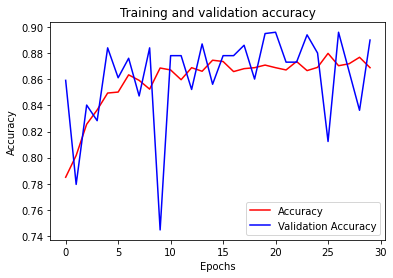

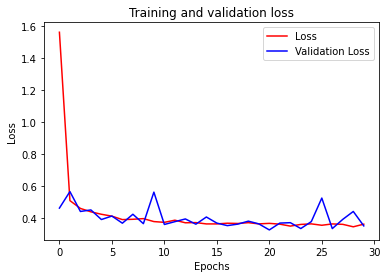

<Figure size 432x288 with 0 Axes>

In [0]:

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


# Expected Output
# A chart where the validation loss does not increase sharply!